In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import math

In [5]:
with (open("higgs.pkl", "rb")) as openfile:
    higgs = pickle.load(openfile)
with (open("qcd.pkl", "rb")) as openfile:
    qcd = pickle.load(openfile)

# 1) Do all features provide discrimination power between signal and background?

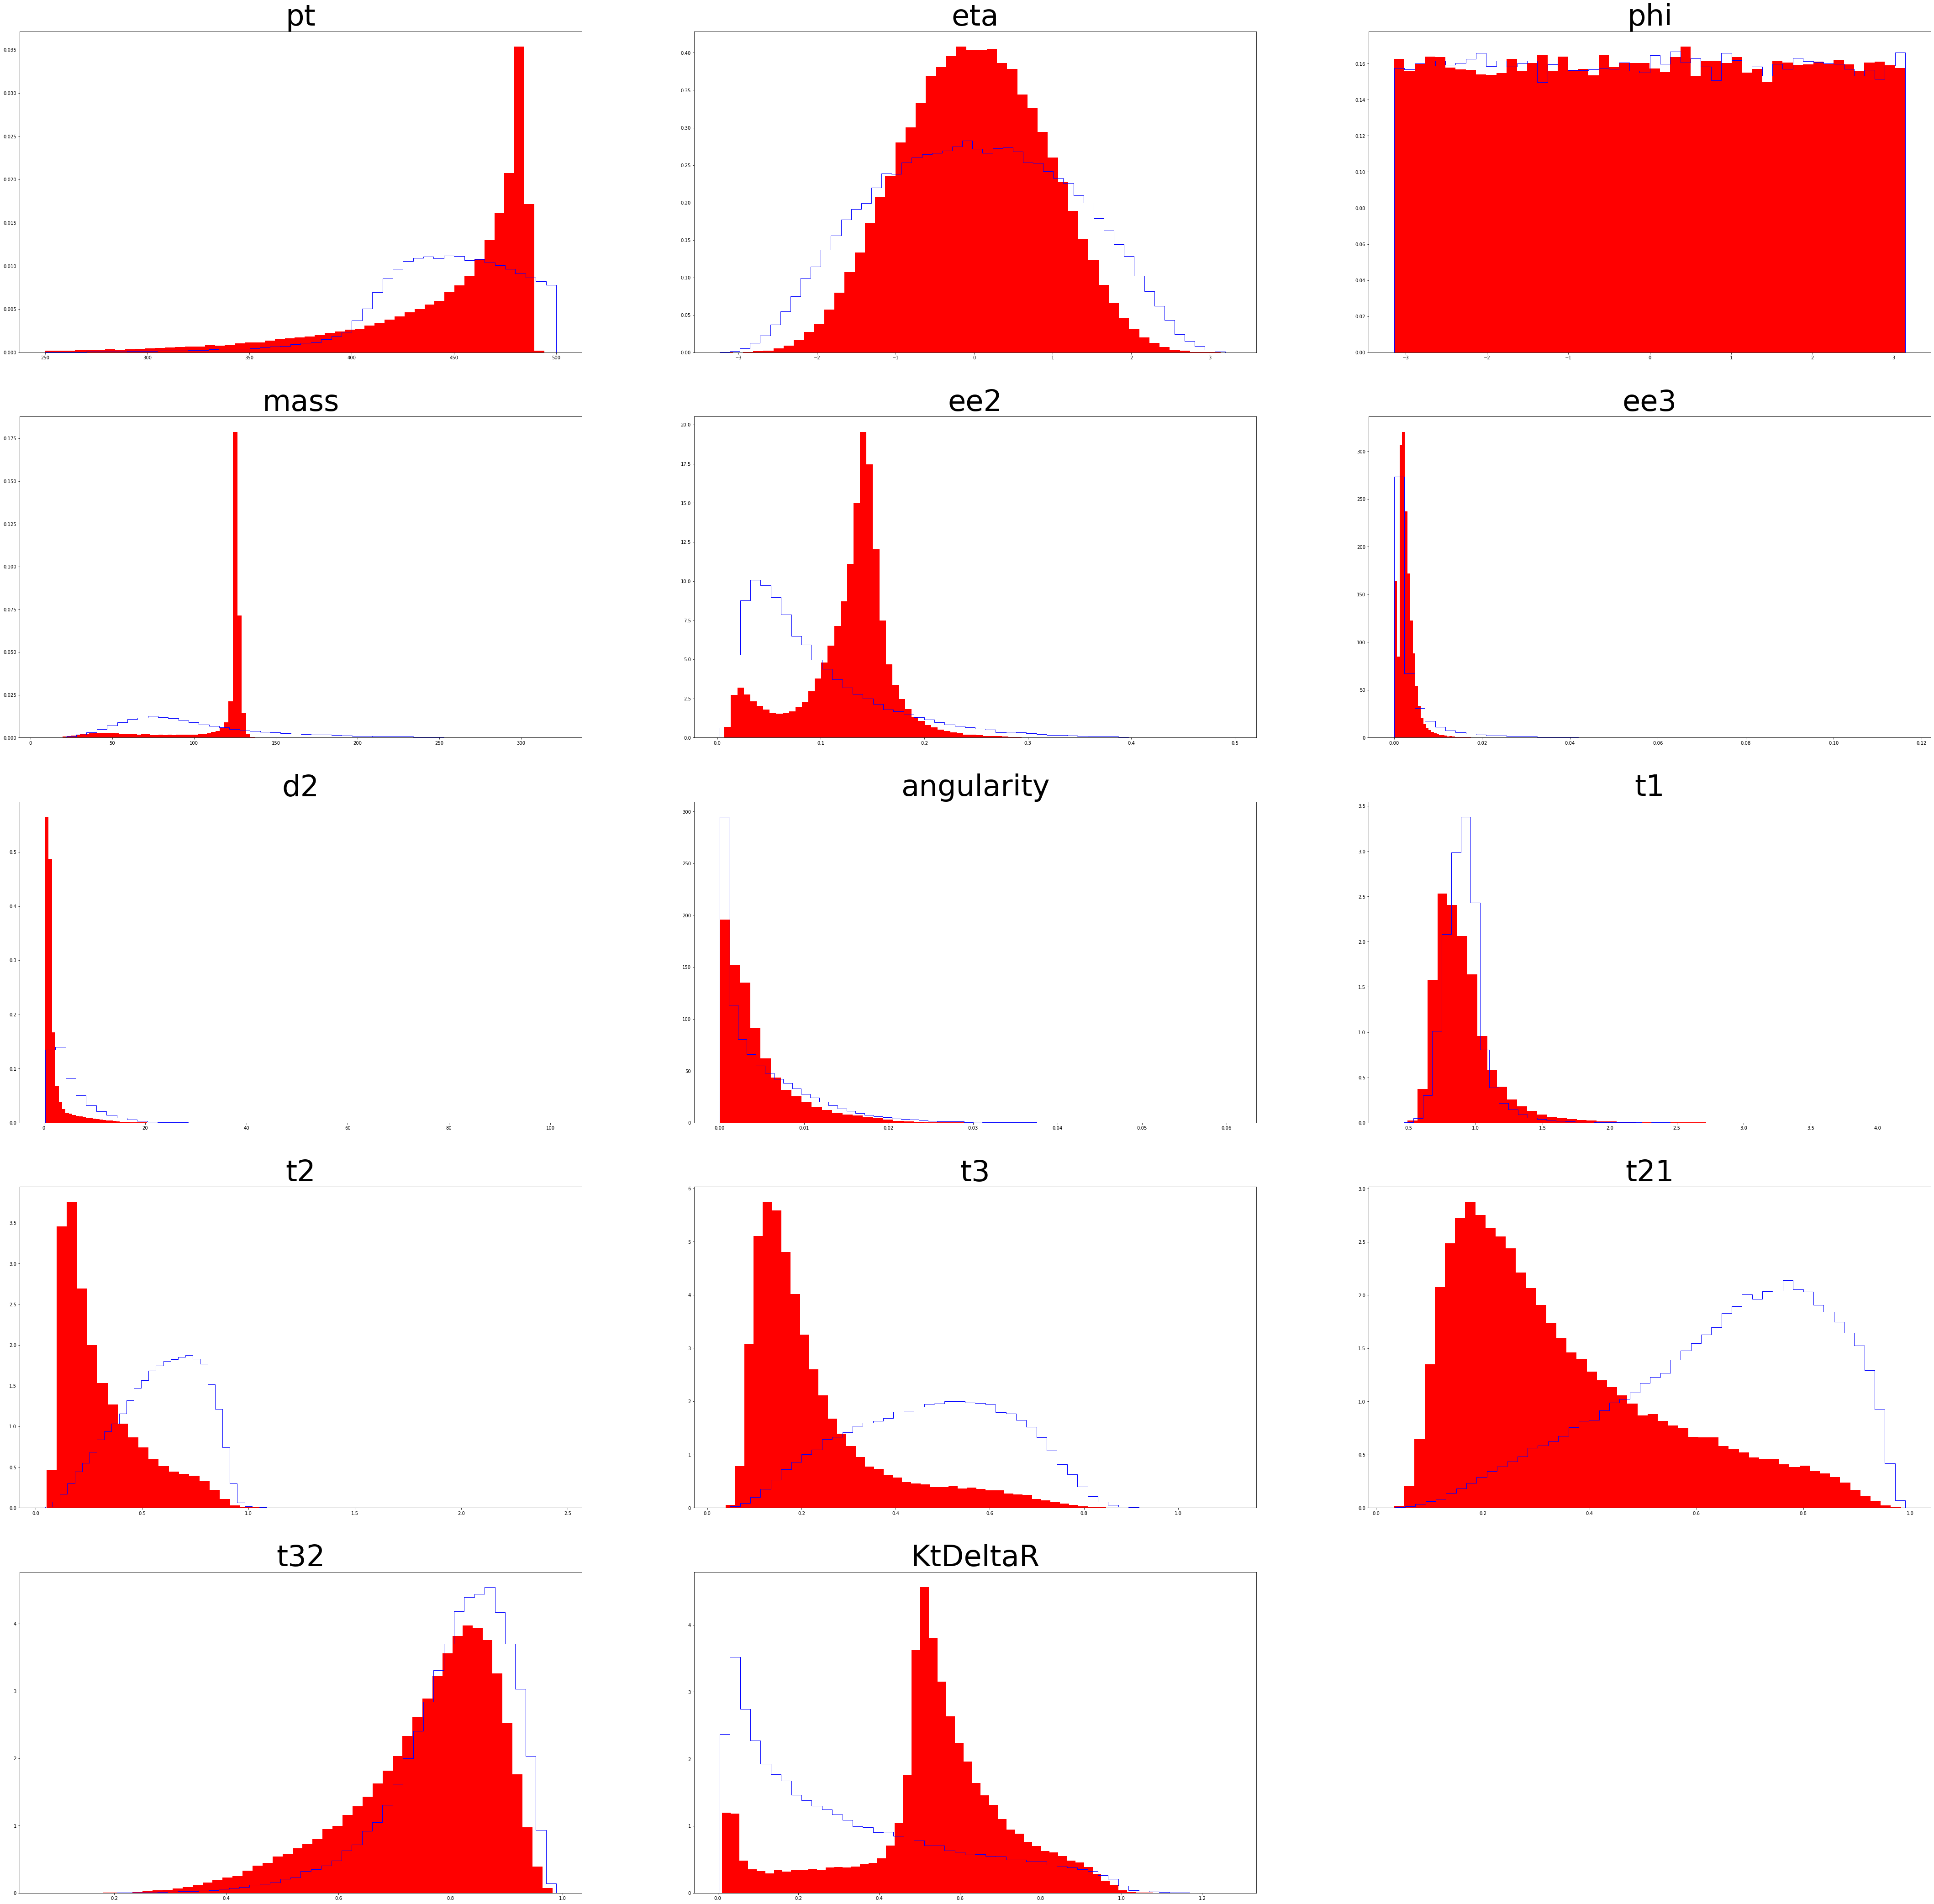

In [24]:
plt.rcParams["figure.figsize"] = (75,75)
fig, ax = plt.subplots(nrows = 5, ncols = 3)
x = range(100000)
for i in range(14):
    ax[math.floor(i/3),i%3].hist(qcd[qcd.columns[i]], color = 'blue', bins = 50, histtype = 'step', density = True)
    ax[math.floor(i/3),i%3].hist(higgs[higgs.columns[i]], color='red', bins = 50, density = True)
    ax[math.floor(i/3),i%3].set_title(str(higgs.columns[i]), fontsize = 64)
ax[4,2].axis('off')
plt.semilogy()
plt.show()

From the above graphs, we can use several of them to determine if our candidate was a potential Higgs particle, while many others wont work. First, we know that eta, phi, angularity, t1, and t32 would all be bad choices to look for the Higgs in. All of these have much over their distribution overlapping with the background. This means that it would be unlikely that the we would recieve a measurement from the Higgs at a value of significance relative to the background since much of the likelyhood of getting a measurement of the Higgs in these parameters is in line with the low significance of the background. This leaves us with pt, mass, ee2, ee3, d2, t2, t3, t21, and KtDeltaR as potential features that we can use. These are good features to use since they are very different from the background. 

# 2) Are there correlations among these features?

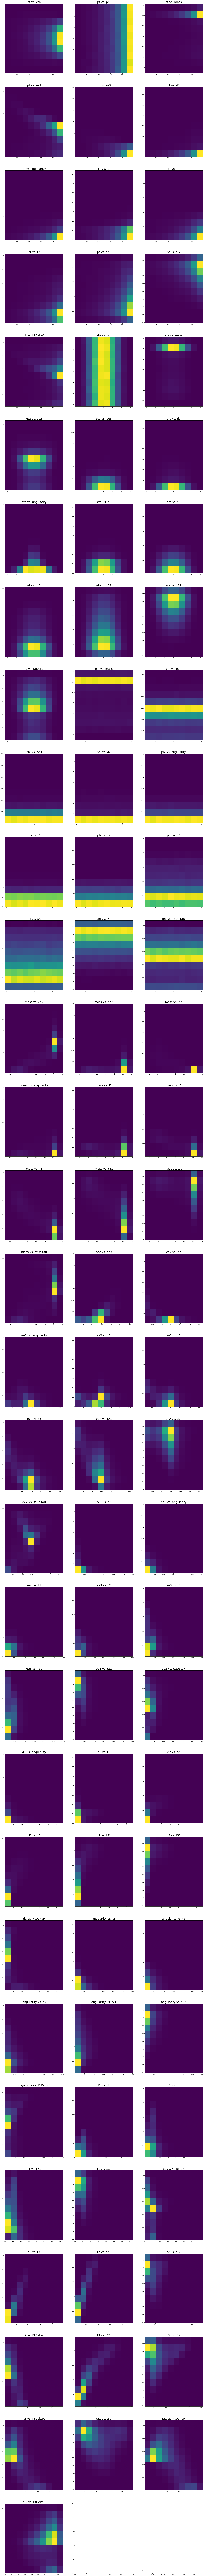

In [70]:
plt.rcParams["figure.figsize"] = (30,400)
fig, ax = plt.subplots(nrows = 31, ncols = 3)
x = range(100000)
pltNum = 0
for i in range(14):
    for j in range(i+1,14):
        ax[math.floor((pltNum)/3),(pltNum)%3].hist2d(higgs[higgs.columns[i]], higgs[higgs.columns[j]])
        ax[math.floor((pltNum)/3),(pltNum)%3].set_title(str(higgs.columns[i]) + " vs. " + str(higgs.columns[j]), fontsize = 24)
        pltNum += 1
plt.semilogy()
plt.show()